# L11 波士顿房价预测模型

这节课我们需要做的就是预测波士顿房价。我们可以找到的数据集如下：

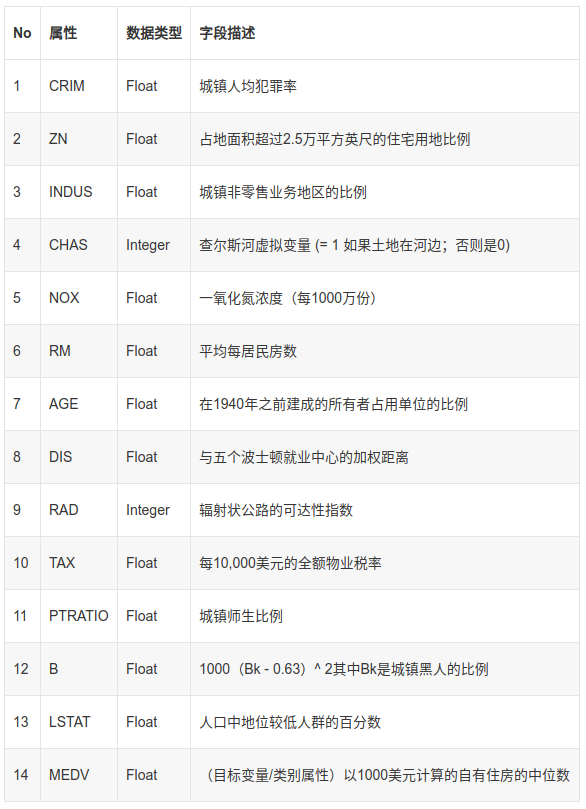

这是美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息，数据集不大，只有506条记录，13个特征，没有缺失值。

现在我们开始解决这个问题。

## 0. 数据集的基本情况

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 查看数据集的基本情况
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [217]:
# 查看数据集的前若干行
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [218]:
# 查看数值属性的摘要信息
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


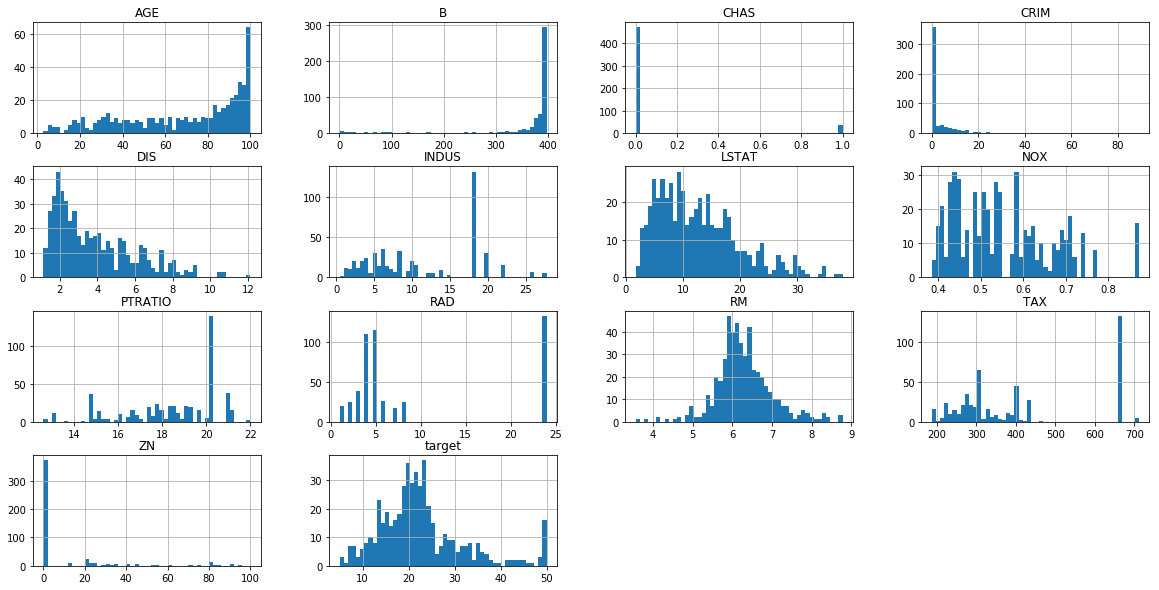

In [220]:
# 查看数据的分布
df.hist(bins=50, figsize=(20, 10))
plt.show()

## 1. 相关性分析

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 计算特征与目标的相关性
# 小数据集可以这样计算
corr = df.corr()
print(corr['target'].sort_values(ascending=False))

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64


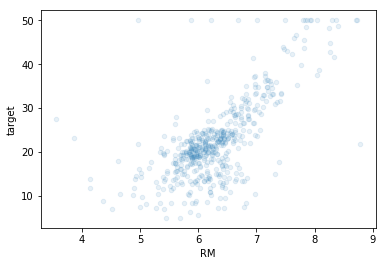

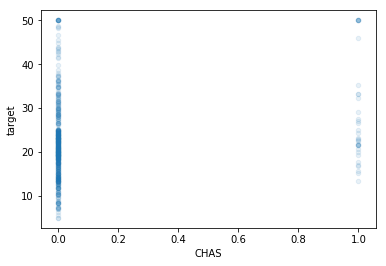

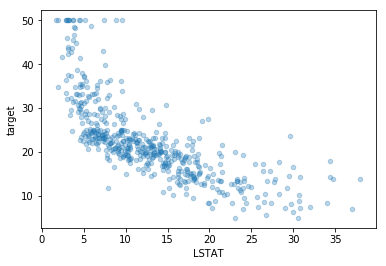

In [17]:
# 相关性散点图
df.plot(kind='scatter', x='RM', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='CHAS', y='target', alpha=0.1)
plt.show()
df.plot(kind='scatter', x='LSTAT', y='target', alpha=0.3)
plt.show()

## 2. 特征分析

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset_filename = '../datasets/boston.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)

# 随机拆分: random_state
print("第1次split, random_state=2:")
train_set, test_set = train_test_split(df, test_size=0.5, random_state=2)
train_set.head()

第1次split, random_state=2:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


In [41]:
print("第2次split, random_state=2:")
train_set, test_set = train_test_split(df, test_size=0.5, random_state=2)
train_set.head()

第2次split, random_state=2:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
237,0.51183,0.0,6.20,0,0.507,7.358,71.6,4.1480,8,307,17.4,390.07,4.73,31.5
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
388,14.33370,0.0,18.10,0,0.700,4.880,100.0,1.5895,24,666,20.2,372.92,30.62,10.2
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7


In [42]:
print("第3次split:")
train_set, test_set = train_test_split(df, test_size=0.5)
train_set.head()

第3次split:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
202,0.02177,82.5,2.03,0,0.415,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3


In [148]:
print("第4次split:")
train_set, test_set = train_test_split(df, test_size=0.5)
train_set.head()

第4次split:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
110,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00,21.7
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,384.07,14.79,30.7
268,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0


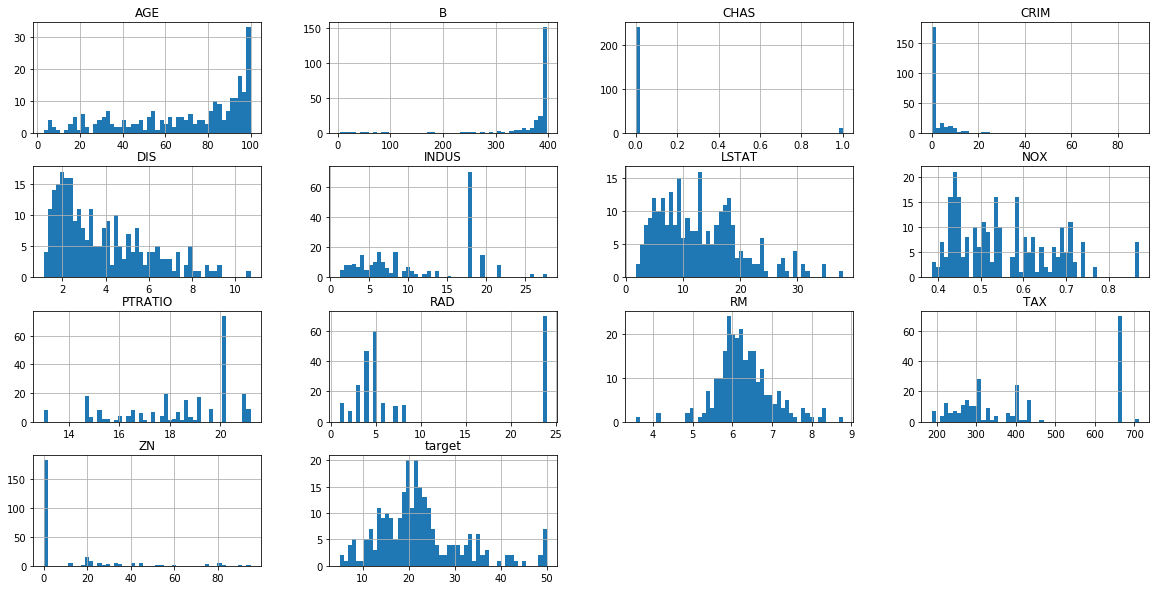

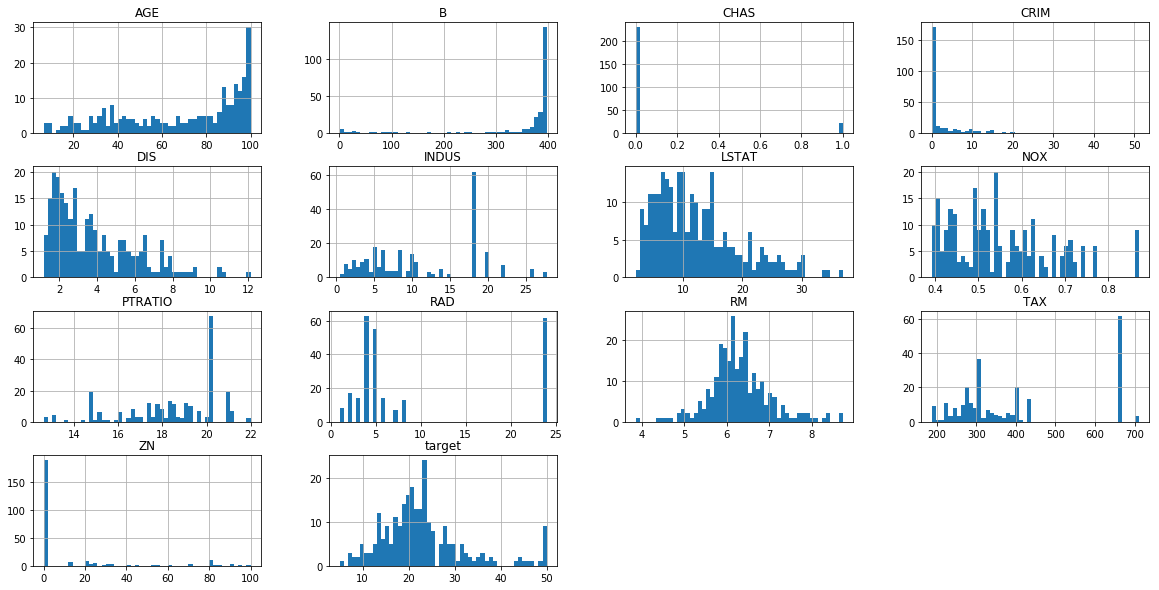

随机split时，特征分布并不一定均匀


In [44]:
# 查看特征分布是否均匀
train_set.hist(bins=50, figsize=(20, 10))
plt.show()
test_set.hist(bins=50, figsize=(20, 10))
plt.show()
print("随机split时，特征分布并不一定均匀")

In [48]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

## 3. 构建线性回归模型
### 3.1 单变量线性回归模型

In [115]:
from sklearn.linear_model import LinearRegression as lr

# 先从一个特征变量开始
train_x = pd.DataFrame(train_set, columns=['LSTAT'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

[[-0.91471651]] [34.0373513]


In [116]:
# model.coef_, model.intercept_：这两个参数是什么意思
print(test_x[:5]) 
print(model.predict(test_x[:5]))

print([x * model.coef_ + model.intercept_ for x in test_x['LSTAT'][:5]])

     LSTAT
77   10.27
281   4.59
363  14.64
323  11.74
432  12.03
[[24.64321272]
 [29.83880251]
 [20.64590157]
 [23.29857945]
 [23.03331166]]
[array([[24.64321272]]), array([[29.83880251]]), array([[20.64590157]]), array([[23.29857945]]), array([[23.03331166]])]


In [120]:
from sklearn.metrics import mean_absolute_error

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

训练误差： 31.184329116972446
测试误差： 30.171188107267334


In [121]:
train_x = pd.DataFrame(train_set, columns=['RM'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['RM'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

训练误差： 42.12378730756649
测试误差： 45.25694328960064


### 3.2 增加特征优化模型

In [122]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.60242001  4.86223544]] [-0.38286184]
训练误差： 31.184329116972446
测试误差： 30.171188107267334


In [123]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM', 'CHAS'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM', 'CHAS'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.60747362  4.77323359  3.07209001]] [0.02040238]
训练误差： 30.563034515387226
测试误差： 28.70216407494041


In [124]:
train_x = pd.DataFrame(train_set, columns=['LSTAT', 'RM', 'PTRATIO'])
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=['LSTAT', 'RM', 'PTRATIO'])
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-0.52975512  4.22334101 -1.01637237]] [21.53042489]
训练误差： 27.34217126544975
测试误差： 27.277675234590614


In [149]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.52910958e-01  5.05673799e-02  1.05849818e-02  3.18368868e+00
  -2.25053245e+01  3.40600328e+00  2.29343793e-03 -1.67852072e+00
   4.68235669e-01 -1.41171928e-02 -1.12838107e+00  6.12835993e-03
  -6.04026810e-01]] [47.53012615]
训练误差： 24.367933235253037
测试误差： 21.586620711343535


### 3.3 模型调参

In [93]:
lr?

In [150]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr(normalize=True)
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.52910958e-01  5.05673799e-02  1.05849818e-02  3.18368868e+00
  -2.25053245e+01  3.40600328e+00  2.29343793e-03 -1.67852072e+00
   4.68235669e-01 -1.41171928e-02 -1.12838107e+00  6.12835993e-03
  -6.04026810e-01]] [47.53012615]
训练误差： 24.367933235253037
测试误差： 21.586620711343606


### 3.4 优化数据划分

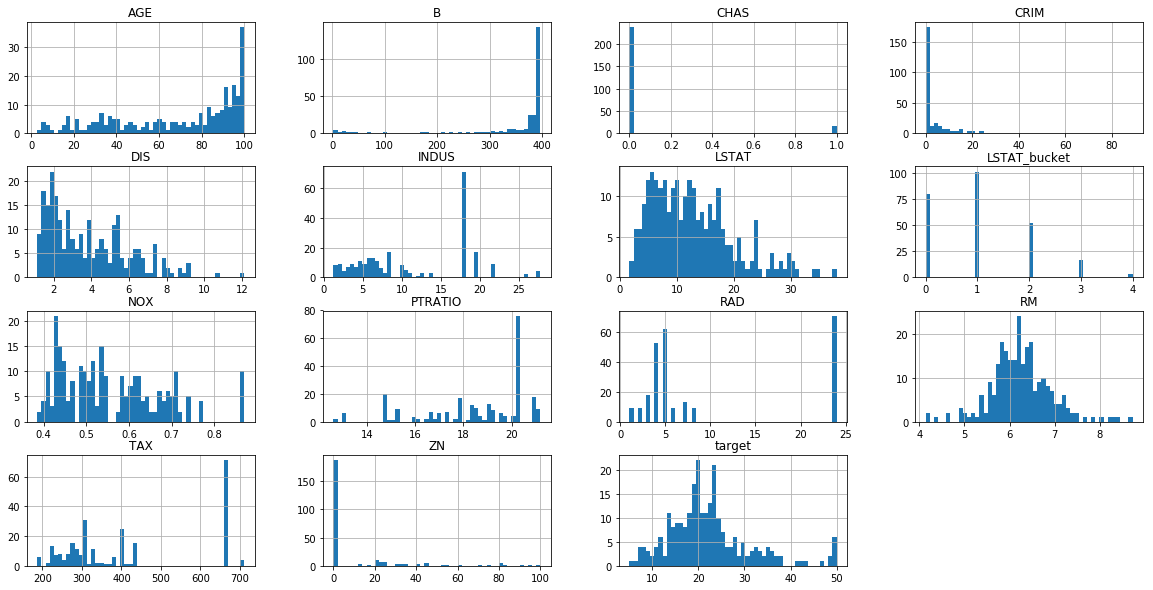

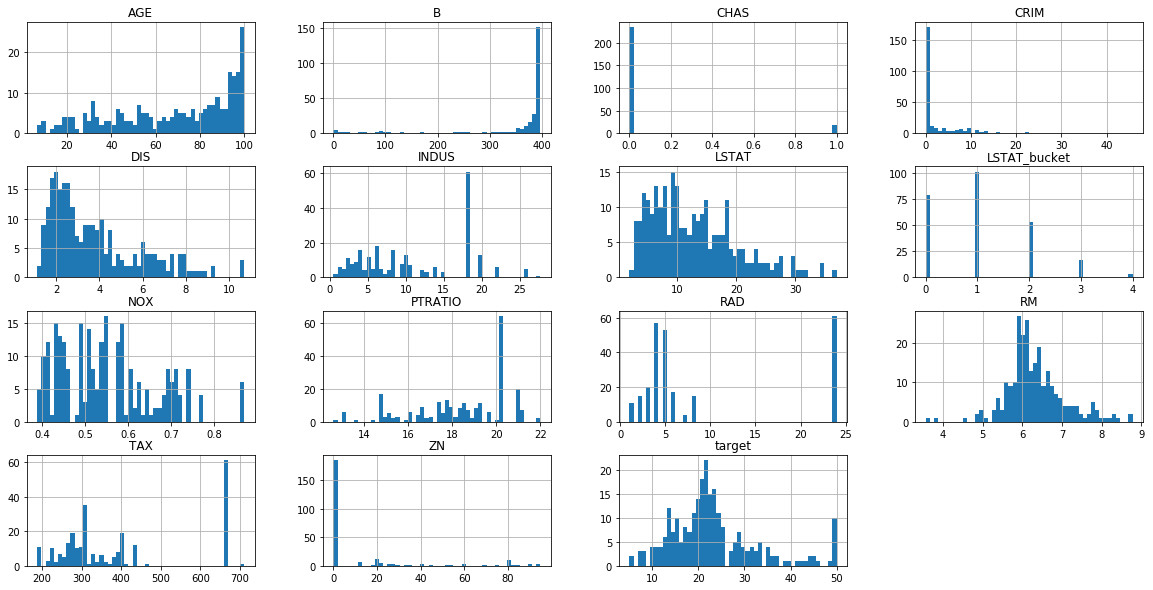

In [151]:
# 分层抽样
# 参数stratify即用来指定按照某一特征进行分层抽样
# 该参数值不能为浮点数
df['LSTAT_bucket'] = [i//8 for i in df['LSTAT']]
train_set, test_set = train_test_split(df, test_size=0.5, stratify=df['LSTAT_bucket'])
train_set.hist(bins=50, figsize=(20, 10))
plt.show()
test_set.hist(bins=50, figsize=(20, 10))
plt.show()
del df['LSTAT_bucket']

In [152]:
features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = lr()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

pred_y = model.predict(train_x)
print("训练误差：", mean_squared_error(train_y, pred_y))

pred_y = model.predict(test_x)
print("测试误差：", mean_squared_error(test_y, pred_y))

[[-1.33794547e-01  5.18038510e-02  4.21440495e-02  1.88036013e+00
  -1.79074915e+01  3.21410232e+00  1.27970815e-02 -1.38090845e+00
   3.81549688e-01 -1.24821406e-02 -9.18548074e-01  1.01705592e-02
  -7.81569028e-01  1.49089291e+00]] [38.94502054]
训练误差： 21.590103975250862
测试误差： 23.25203420066652


## 4. 尝试更多的回归模型

In [170]:
from sklearn.linear_model import LogisticRegression as LR

# 查看算法参数
LR?

In [158]:
dataset_filename = '../datasets/iris.csv'

# 读取数据集
df = pd.read_csv(dataset_filename)
train_set, test_set = train_test_split(df, test_size=0.4, random_state=2)

In [180]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

features = train_set.columns.tolist()
features.remove('target')

train_x = pd.DataFrame(train_set, columns=features)
train_y = pd.DataFrame(train_set, columns=['target'])

test_x = pd.DataFrame(test_set, columns=features)
test_y = pd.DataFrame(test_set, columns=['target'])

model = LR(solver='lbfgs', multi_class='multinomial')
model.fit(train_x, train_y)

pred_y = model.predict(train_x)
print("训练F1：", f1_score(train_y, pred_y, average='macro'))

pred_y = model.predict(test_x)
print("测试F1：", f1_score(test_y, pred_y, average='macro'))

训练F1： 0.9681254743232989
测试F1： 0.9274509803921568


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
model = LR(solver='lbfgs', multi_class='multinomial', max_iter=60)
model.fit(train_x, train_y)

pred_y = model.predict(train_x)
print("训练F1：", f1_score(train_y, pred_y, average='macro'))

pred_y = model.predict(test_x)
print("测试F1：", f1_score(test_y, pred_y, average='macro'))

训练F1： 0.9681254743232989
测试F1： 0.9274509803921568


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### 4.1 调参优化

In [214]:
model = LR(solver='sag', multi_class='auto', C=200.0)
model.fit(train_x, train_y)

pred_y = model.predict(train_x)
print("训练F1：", f1_score(train_y, pred_y, average='macro'))

pred_y = model.predict(test_x)
print("测试F1：", f1_score(test_y, pred_y, average='macro'))

训练F1： 0.9681254743232989
测试F1： 0.9817689085981769


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
